<a href="https://colab.research.google.com/github/ndazeo/ankloud-deploys/blob/main/deploy_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vtk
import numpy as np
from google.colab import drive
drive.mount("/content/gdrive/")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 12.0 MB/s eta 0:00:00
Mounted at /content/gdrive/


In [3]:
import vtk
from vtk.numpy_interface import dataset_adapter as dsa

def open(filename):
  reader = vtk.vtkPolyDataReader()
  reader.SetFileName(filename)
  reader.ReadAllScalarsOn()
  reader.ReadAllVectorsOn()
  reader.Update()
  return dsa.WrapDataObject(reader.GetOutput())

In [4]:
t1 = [
    [-3.99341789, -9.52261083, -6.32675576],
    [  2.28220504,  -5.73482951, -13.58637434],
    41,5926
]
t1cl = f'/content/gdrive/MyDrive/Pladema/ANKloud/clinic/ts/VesselCenterline - T1 Derivo4.0x20.vtk'

t2 = [
    [-4.27963302, -8.24667364, -6.35095714],
    [  2.33440983,  -5.81547885, -12.97111967],
    41,5926
]
t2cl = f'/content/gdrive/MyDrive/Pladema/ANKloud/clinic/ts/VesselCenterline - T1 Derivo4.0x20.vtk'

t3 = [
  [78.7693921175144, 47.67446054381513, -86.97168256553952],
  [85.46609894062203, 47.63836786020098, -94.70322295270363],
  31.8251
]

t3cl = f'/content/gdrive/MyDrive/Pladema/ANKloud/clinic/ts/VesselCenterline - T3 Derivo4.5x30.vtk'

t4 = [
  [5.939937723817355,-181.485750378504,-207.12228904339912],
  [4.783989783309632,-180.65804111991378,-211.88494419797863],
  23.7039
]
t4cl = f'/content/gdrive/MyDrive/Pladema/ANKloud/clinic/ts/VesselCenterline - T4 Derivo4.0x15.vtk'

t5 = [
  [139.18160710534926,-186.12737094792533,-219.03548563135732],
  [139.88378529706293,-182.50283446359435,-229.22495535484987],
  20.9672
]
t5cl = f'/content/gdrive/MyDrive/Pladema/ANKloud/clinic/ts/VesselCenterline - T5 Derivo4.0x15.vtk'

In [5]:
import matplotlib.pyplot as plt

def genPlot(clpath, points, stent, deploys=None):
  cl = open(clpath)

  proximalIds = cl.PointData[stent]
  #abscissas = cl.PointData['Abscissas'] - (points[2] if len(points)>2 else 0)
  filter = proximalIds>=0

  perimeter = cl.PointData['Perimeter']
  curvature = cl.PointData['Curvature']
  sphradius = cl.PointData['MaximumInscribedSphereRadius']

  
  # ids = np.arange(proximalIds.shape[0])
  distalId = np.linalg.norm(cl.Points-points[0],axis=1).argmin()
  proximalId = np.linalg.norm(cl.Points-points[1],axis=1).argmin()
  abscissas = cl.PointData['Abscissas'] - cl.PointData['Abscissas'][proximalId]
  
  optimal_dist = abscissas[proximalIds][filter]-abscissas[proximalId]

  print(proximalId,cl.PointData['Abscissas'][proximalId])
  print(distalId, cl.PointData['Abscissas'][distalId])
  
  fig, ax = plt.subplots()

  x,y = abscissas[filter], optimal_dist

  aneurysm_section = perimeter[filter] > 20
  curvature_section = (curvature[filter] > 1) & (aneurysm_section == False)
  #other = (aneurysm_section == False) & (curvature_section == False)
  point_class = aneurysm_section * 2 + curvature_section

  points = np.array([x, y]).T.reshape(-1, 1, 2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1)

  # Use a boundary norm instead
  #cmap = ListedColormap(['#1f77b4', 'g', 'b'])
  #norm = BoundaryNorm([0, 1, 2, 3], cmap.N)
  #lc = LineCollection(segments, cmap=cmap, norm=norm)
  #lc.set_array(point_class)
  #line = ax.add_collection(lc)
  ax.plot(x,y)
  
  ax.axhline(y=0, color='k', linewidth=.5)

  if deploys:
    for deploy in deploys:
      x = abscissas[deploy["id"]]
      y = abscissas[proximalIds[deploy["id"]]]
      
      print(proximalIds[deploy["id"]], cl.PointData['Abscissas'][proximalIds[deploy["id"]]])
      print(deploy["id"], cl.PointData['Abscissas'][deploy["id"]])
      
      plt.plot(x, y, marker="o", markersize=10, markeredgecolor="k", markerfacecolor=deploy["color"])
  else:
    #ax.axvline(x=abscissas[distalId], color='#033500', linewidth=.5) # measured
    x = abscissas[distalId]
    y = abscissas[proximalIds[distalId]]
    plt.plot(x, y, marker="o", markersize=10, markeredgecolor="k", markerfacecolor="#96f97b")
  
  ax.axvline(x=abscissas[filter][np.abs(optimal_dist).argmin()], color='#96f97b', linewidth=.5) # predicted
  
  print(abscissas[distalId]-abscissas[filter][np.abs(optimal_dist).argmin()])
  ax.set_ylabel("Proximal position (mm)")
  ax.set_xlabel("Distal position (mm)")
  #ax.xaxis.tick_top()
  #ax.xaxis.set_label_position('top') 
  #plt.yticks(fontsize=16,)
  #plt.xticks(fontsize=16,)

  plt.show()
  return fig

62 21.669777583
138 48.233536139
34.952365622


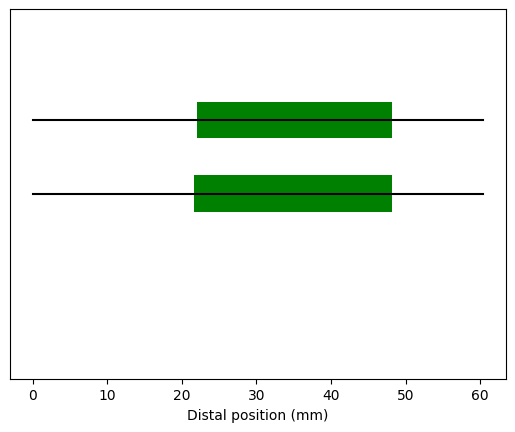

In [15]:
import matplotlib.pyplot as plt
from matplotlib import patches

def genPlot(clpath, points, stent, deploys=None):
  cl = open(clpath)

  proximalIds = cl.PointData[stent]
  #abscissas = cl.PointData['Abscissas'] - (points[2] if len(points)>2 else 0)
  # filter = proximalIds>=0

  perimeter = cl.PointData['Perimeter']
  curvature = cl.PointData['Curvature']
  sphradius = cl.PointData['MaximumInscribedSphereRadius']

  # ids = np.arange(proximalIds.shape[0])
  distalId = np.linalg.norm(cl.Points-points[0],axis=1).argmin()
  proximalId = np.linalg.norm(cl.Points-points[1],axis=1).argmin()
  abscissas = cl.PointData['Abscissas']
  ss = np.array([-1,1] * (abscissas.shape[0] // 2))

  optimal_dist = abscissas[proximalIds]

  print(proximalId,cl.PointData['Abscissas'][proximalId])
  print(distalId, cl.PointData['Abscissas'][distalId])
  
  fig, ax = plt.subplots()


  def plotStent(proximalId, distalId, height=None, color=None):
    x0 = abscissas[proximalId]
    xs = abscissas[distalId] - x0
    y0 = (height or 0) -.5
    ys = 1
    x,y = abscissas, np.full(abscissas.shape, height or 0)
    ax.plot(x,y, color='k')
    rect = patches.Rectangle((x0, y0), xs, ys, linewidth=0, facecolor='green')
    ax.add_patch(rect)

  plotStent(proximalId, distalId)
  
  if deploys:
    for deploy in deploys:
      distalId = deploy["id"]
      proximalId = proximalIds[deploy["id"]]
      plotStent(proximalId, distalId)
  else:
    proximalId = proximalIds[distalId]
    plotStent(proximalId, distalId, height=2)
  
  print(abscissas[distalId]-abscissas[np.abs(optimal_dist).argmin()])
  ax.set_xlabel("Distal position (mm)")

  ax.get_yaxis().set_visible(False)
  plt.ylim(-5,5)
  
  #ax.xaxis.tick_top()
  #ax.xaxis.set_label_position('top') 
  #plt.xticks(fontsize=16,)

  plt.show()
  return fig

fig = genPlot(t1cl, t1, 'derivo4.0x20')
fig.savefig('t1_4.0x20.png')


62 21.669777583
138 48.233536139
34.952365622


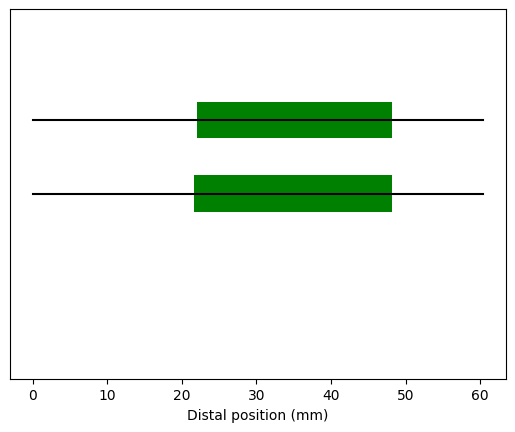

In [16]:
fig = genPlot(t2cl,t2, 'derivo4.0x20')
fig.savefig('t2_4.0x20.png')

40 13.988234852
133 46.509816858
14.684716937000001


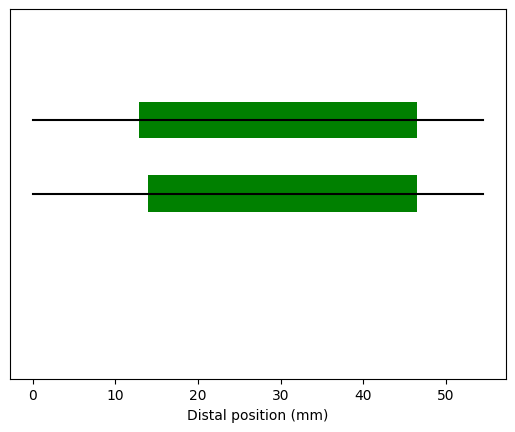

In [17]:
fig = genPlot(t3cl, t3, 'derivo4.5x30')
fig.savefig('t3_4.5x30.png')

43 14.9897
98 34.1625
22.3108


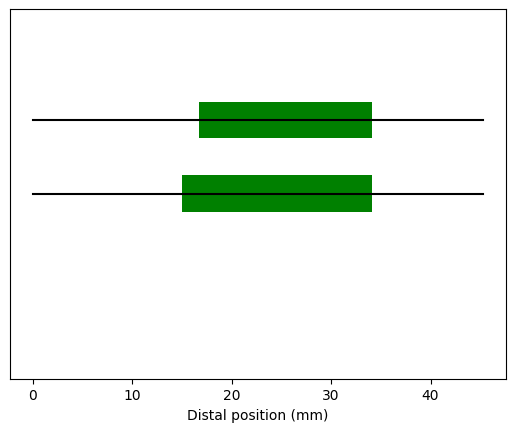

In [18]:
fig = genPlot(t4cl, t4, 'derivo4.0x15')
fig.savefig('t4_4.0x15.png')

26 9.0859086348
90 31.450901711
17.82210263


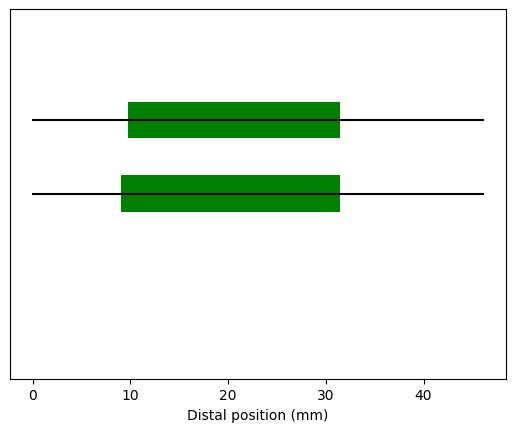

In [19]:
fig = genPlot(t5cl, t5, 'derivo4.0x15')
fig.savefig('t5_4.0x15.png')

In [ ]:
deploys = [
    {"id":138, "color":"#15b01a"},
    {"id":158, "color":"#f97306"}, 
    {"id":88, "color":"#ffb07c"}
]

fig = genPlot(t1cl, t1, 'derivo4.0x20', deploys)
fig.savefig('deploys.png')

In [ ]:
deploys = [
    {"id":149, "color":"#f97306"},
]

fig = genPlot(t1cl, t1, 'derivo4.0x20', deploys)
fig.savefig('deploy149.png')

In [ ]:
cl = open(t1cl)
print(cl.PointData["Curvature"].min())
print(cl.PointData["Curvature"].max())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots()

print(segments.shape)
print(dydx.shape)

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
line = ax.add_collection(lc)


ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.1, 1.1)
plt.show()